In [1]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv"
)

In [24]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df.shape

(9, 7)

In [5]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [6]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [7]:
df["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [8]:
df["ST_NUM"].isna().sum()

2

In [9]:
df["NUM_BEDROOMS"].isna().sum()

2

In [41]:
list_missing_values = ["n/a", "--", "na"]
df = pd.read_csv(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
    na_values=list_missing_values
)

In [42]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [44]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [45]:
# handle unknown values
idx = 0
for value in df["OWN_OCCUPIED"]:
    try:
        int(value)
        df.loc[idx, "OWN_OCCUPIED"] = np.nan
    except ValueError:
        pass
    idx += 1

In [46]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [37]:
df["NEW_OWN_OCCUPIED"] = df["OWN_OCCUPIED"].apply(
    lambda val: 1 if val == "Y" else 0
)

In [38]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,NEW_OWN_OCCUPIED
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,1
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,0
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700,0
4,NaN,203.0,BERKELEY,Y,3,2,1600,1
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,1
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,0
7,100008000.0,213.0,TREMONT,Y,--,1,NaN,1
8,100009000.0,215.0,TREMONT,Y,na,2,1800,1


In [39]:
df.isna().sum()

PID                 1
ST_NUM              2
ST_NAME             0
OWN_OCCUPIED        2
NUM_BEDROOMS        2
NUM_BATH            1
SQ_FT               1
NEW_OWN_OCCUPIED    0
dtype: int64

In [51]:
df.isna().values.any()

True

In [53]:
df.isna().sum().sum()

12

In [54]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [66]:
# handle unknown values
idx = 0
for value in df["NUM_BATH"]:
    try:
        float(value)
        df.loc[idx, "NEW_NUM_BATH"] = round(float(value))
    except ValueError:
        df.loc[idx, "NEW_NUM_BATH"] = np.nan
    idx += 1

In [69]:
df.drop(
    columns="NUM_BATH",
    inplace=True
)

In [70]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,2
2,100003000.0,NaN,LEXINGTON,N,NaN,850.0,1
3,100004000.0,201.0,BERKELEY,NaN,1.0,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,NaN,800.0,1
6,100007000.0,NaN,WASHINGTON,NaN,2.0,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,NaN,1
8,100009000.0,215.0,TREMONT,Y,NaN,1800.0,2


In [73]:
df['ST_NUM'].fillna(125, inplace=True)

In [74]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,2
2,100003000.0,125.0,LEXINGTON,N,NaN,850.0,1
3,100004000.0,201.0,BERKELEY,NaN,1.0,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,NaN,800.0,1
6,100007000.0,125.0,WASHINGTON,NaN,2.0,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,NaN,1
8,100009000.0,215.0,TREMONT,Y,NaN,1800.0,2


In [77]:
mean_num_bedrooms = df.NUM_BEDROOMS.mean()
median_num_bedrooms = df.NUM_BEDROOMS.median()
df["NUM_BEDROOMS"].fillna(median_num_bedrooms, inplace=True)

In [78]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,2
2,100003000.0,125.0,LEXINGTON,N,3.0,850.0,1
3,100004000.0,201.0,BERKELEY,NaN,1.0,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,3.0,800.0,1
6,100007000.0,125.0,WASHINGTON,NaN,2.0,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,3.0,NaN,1
8,100009000.0,215.0,TREMONT,Y,3.0,1800.0,2


In [86]:
df_obes = pd.read_excel("../data/obes.xls", sheet_name="7.2")

In [87]:
df_obes

,"Table 7.2 Finished Admission Episodes with a primary diagnosis of obesity, by age group, 2002/03 to 2012/13",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numbers
3,NaN,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002/03,1275,400,65,136,289,216,94,52,23
6,2003/04,1711,579,67,174,391,273,151,52,24
7,2004/05,2035,547,107,287,487,364,174,36,32
8,2005/06,2564,583,96,341,637,554,258,72,20
9,2006/07,3862,656,184,461,1069,872,459,118,43


In [89]:
obes = pd.ExcelFile("../data/obes.xls")

In [88]:
obes

In [90]:
obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [91]:
obes_age = obes.parse("7.2", skiprows=4, skipfooter=14)

In [92]:
obes_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [93]:
obes_age.rename(
    columns={'Unnamed: 0': "Year"},
    inplace=True
)

In [95]:
obes_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [96]:
obes_age.dropna(inplace=True)

In [97]:
obes_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [98]:
obes_age.set_index('Year', inplace=True)

In [100]:
obes_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

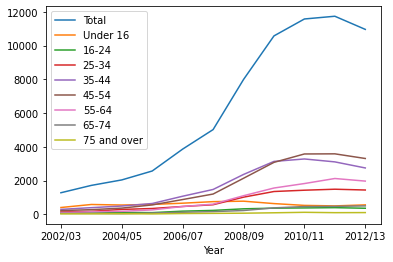

In [101]:
obes_age.plot()

<AxesSubplot:xlabel='Year'>

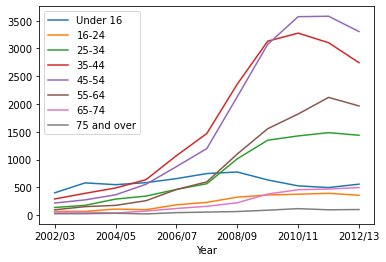

In [102]:
obes_age.drop("Total", axis=1).plot()

<AxesSubplot:xlabel='Year'>

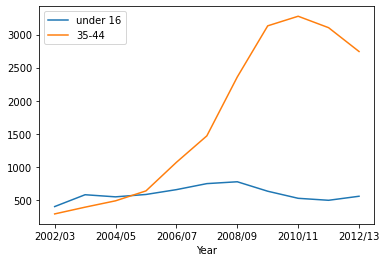

In [104]:
obes_age['Under 16'].plot(label="under 16", legend=True)
obes_age["35-44"].plot(label="35-44", legend=True)

In [105]:
from datetime import datetime

In [112]:
datetime.now().day

8

In [121]:
date_range = pd.date_range(
    start="31/3/2020",
    end=datetime.now(),
    freq="H"
)

In [122]:
date_range

DatetimeIndex(['2020-03-31 00:00:00', '2020-03-31 01:00:00',
               '2020-03-31 02:00:00', '2020-03-31 03:00:00',
               '2020-03-31 04:00:00', '2020-03-31 05:00:00',
               '2020-03-31 06:00:00', '2020-03-31 07:00:00',
               '2020-03-31 08:00:00', '2020-03-31 09:00:00',
               ...
               '2020-10-08 12:00:00', '2020-10-08 13:00:00',
               '2020-10-08 14:00:00', '2020-10-08 15:00:00',
               '2020-10-08 16:00:00', '2020-10-08 17:00:00',
               '2020-10-08 18:00:00', '2020-10-08 19:00:00',
               '2020-10-08 20:00:00', '2020-10-08 21:00:00'],
              dtype='datetime64[ns]', length=4606, freq='H')

In [124]:
df = pd.DataFrame(date_range, columns=["date"])

In [125]:
df

,date
0,2020-03-31 00:00:00
1,2020-03-31 01:00:00
2,2020-03-31 02:00:00
3,2020-03-31 03:00:00
4,2020-03-31 04:00:00
...,...
4601,2020-10-08 17:00:00
4602,2020-10-08 18:00:00
4603,2020-10-08 19:00:00
4604,2020-10-08 20:00:00


In [126]:
df["data"] = np.random.randint(100, size=len(date_range))

In [127]:
df

,date,data
0,2020-03-31 00:00:00,94
1,2020-03-31 01:00:00,63
2,2020-03-31 02:00:00,31
3,2020-03-31 03:00:00,85
4,2020-03-31 04:00:00,56
...,...,...
4601,2020-10-08 17:00:00,32
4602,2020-10-08 18:00:00,50
4603,2020-10-08 19:00:00,97
4604,2020-10-08 20:00:00,87


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4606 non-null   datetime64[ns]
 1   data    4606 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 72.1 KB


In [136]:
df["datetime"] = pd.to_datetime(df["date"])
df

,date,data,datetime
datetime,,,
2020-03-31 00:00:00,2020-03-31 00:00:00,94,2020-03-31 00:00:00
2020-03-31 01:00:00,2020-03-31 01:00:00,63,2020-03-31 01:00:00
2020-03-31 02:00:00,2020-03-31 02:00:00,31,2020-03-31 02:00:00
2020-03-31 03:00:00,2020-03-31 03:00:00,85,2020-03-31 03:00:00
2020-03-31 04:00:00,2020-03-31 04:00:00,56,2020-03-31 04:00:00
...,...,...,...
2020-10-08 17:00:00,2020-10-08 17:00:00,32,2020-10-08 17:00:00
2020-10-08 18:00:00,2020-10-08 18:00:00,50,2020-10-08 18:00:00
2020-10-08 19:00:00,2020-10-08 19:00:00,97,2020-10-08 19:00:00


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      4606 non-null   datetime64[ns]
 1   data      4606 non-null   int64         
 2   datetime  4606 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 108.1 KB


In [134]:
df.set_index("datetime", inplace=True)

In [135]:
df

,date,data
datetime,,
2020-03-31 00:00:00,2020-03-31 00:00:00,94
2020-03-31 01:00:00,2020-03-31 01:00:00,63
2020-03-31 02:00:00,2020-03-31 02:00:00,31
2020-03-31 03:00:00,2020-03-31 03:00:00,85
2020-03-31 04:00:00,2020-03-31 04:00:00,56
...,...,...
2020-10-08 17:00:00,2020-10-08 17:00:00,32
2020-10-08 18:00:00,2020-10-08 18:00:00,50
2020-10-08 19:00:00,2020-10-08 19:00:00,97


In [140]:
opsd_daily = pd.read_csv(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv",
    parse_dates=True, index_col=0
)

In [141]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [142]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [151]:
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Dayname"] = opsd_daily.index.day_name()
opsd_daily["weekday"] = opsd_daily.index.weekday

In [152]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Dayname,weekday
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,3
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,4


In [155]:
opsd_daily.loc["2017-11"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Dayname,weekday
Date,,,,,,,,
2017-11-01,1309.18478,420.446,37.046,457.492,2017,11,Wednesday,2
2017-11-02,1474.19484,336.745,51.504,388.249,2017,11,Thursday,3
2017-11-03,1471.18241,115.927,50.761,166.688,2017,11,Friday,4
2017-11-04,1284.77485,309.381,57.358,366.739,2017,11,Saturday,5
2017-11-05,1193.85495,259.371,25.261,284.632,2017,11,Sunday,6
2017-11-06,1505.67173,98.420,40.298,138.718,2017,11,Monday,0
2017-11-07,1545.63945,148.785,27.302,176.087,2017,11,Tuesday,1
2017-11-08,1547.48171,62.667,18.332,80.999,2017,11,Wednesday,2
2017-11-09,1557.63091,210.488,15.289,225.777,2017,11,Thursday,3


<AxesSubplot:xlabel='Date'>

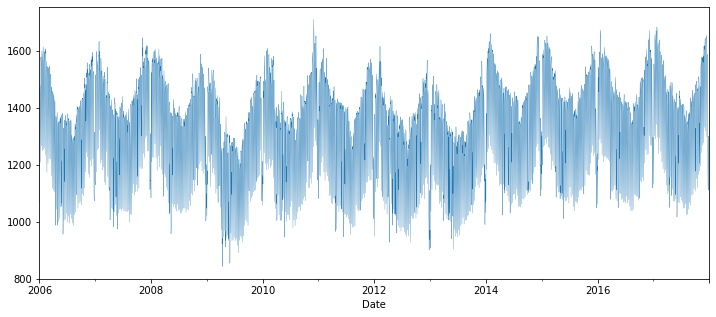

In [161]:
opsd_daily["Consumption"].plot(
    linewidth=.3,
    figsize=(12, 5)
)

<AxesSubplot:xlabel='Date'>

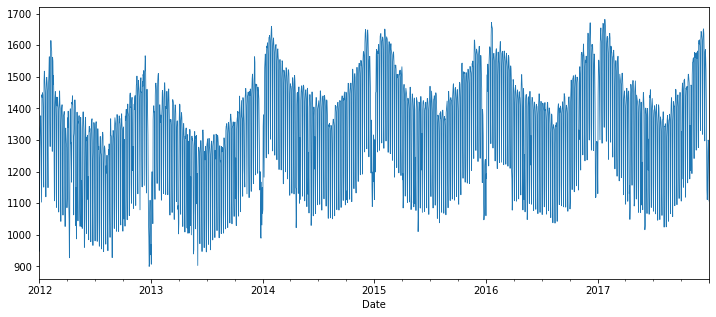

In [163]:
opsd_daily.loc["2012":"2017", "Consumption"].plot(
    linewidth=.8,
    figsize=(12, 5)
)